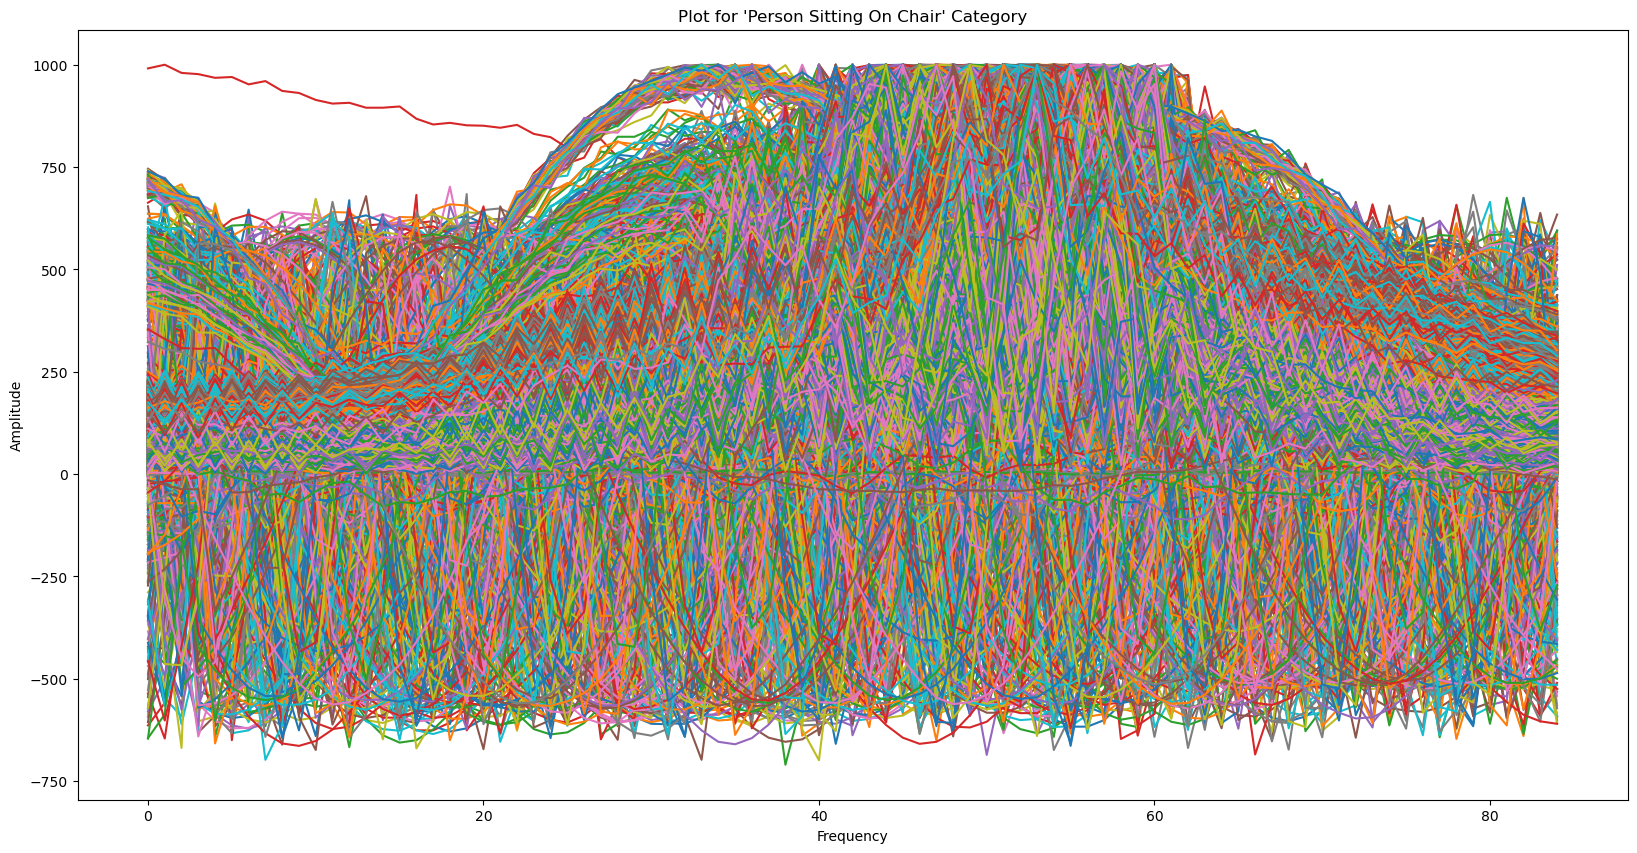

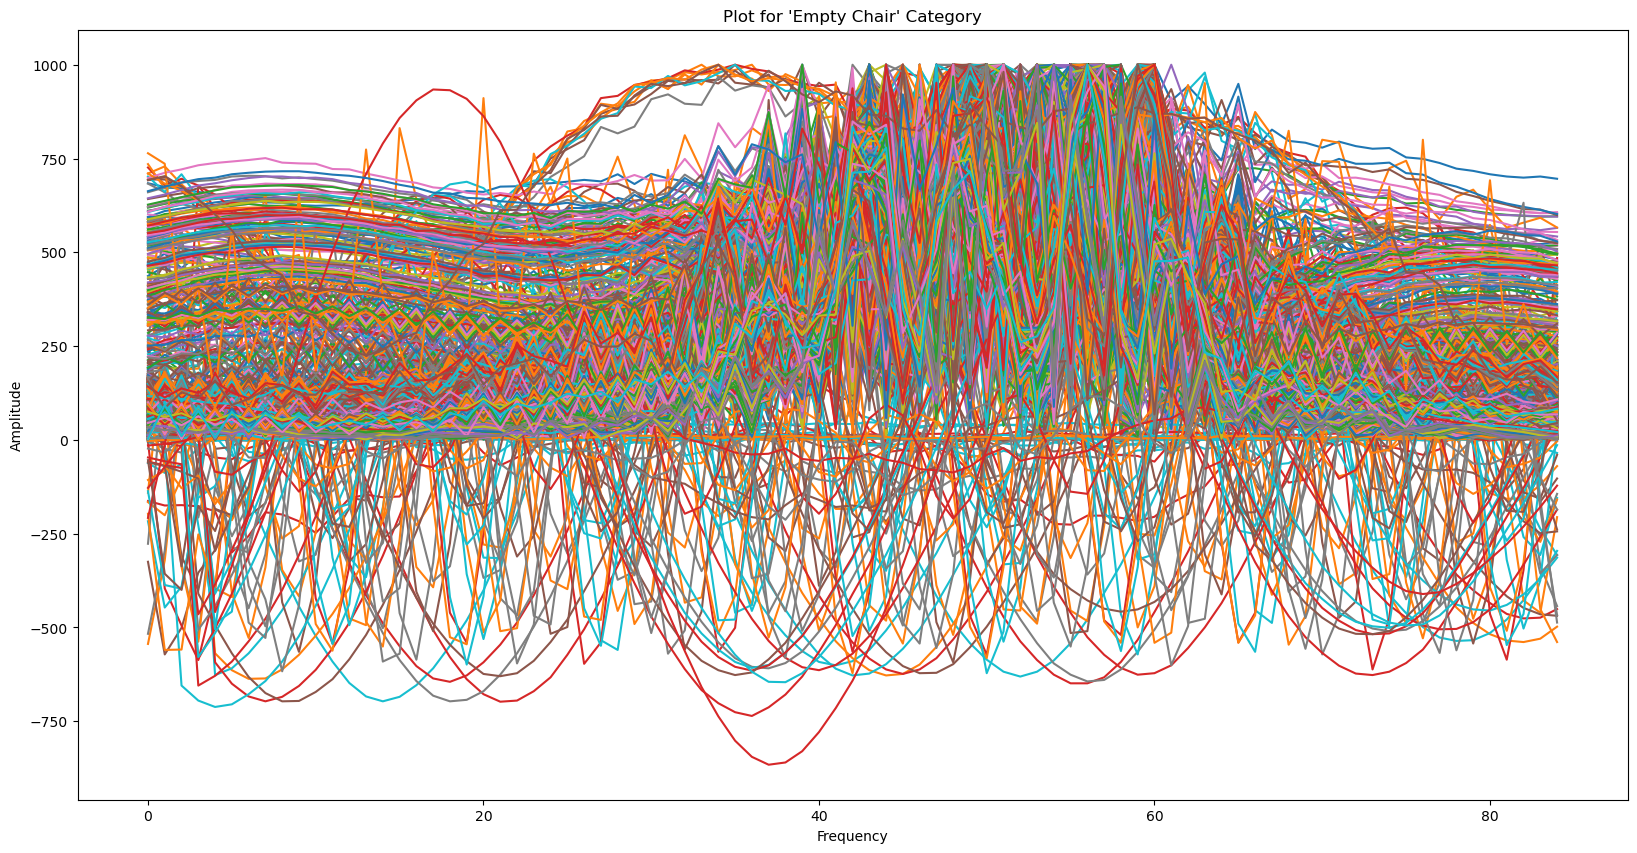

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df_person = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTOD0G0l5yivtXqDfhWdGoKYUSFbVRKIDkSH8IM1hgdbZ7Qt3fbdxJStEI5qsZ03z_LC_KPNVmtrOYF/pub?gid=252194231&single=true&output=csv")  # Replace with the path to your "person sitting on chair" dataset
df_empty = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRaxtjOkn-XV95EE9WyROmxMzIFpEF8cFlfMyOCz25_FwS1RlhBs1ImJQVs89R7cEesEHFUsbtk9Y_b/pub?gid=1711377743&single=true&output=csv")  # Replace with the path to your "empty chair" dataset

# Exclude the first column
df_person = df_person.iloc[:, 1:]
df_empty = df_empty.iloc[:, 1:]

# Step 2: Plot sensor measurement values for a subset of rows
num_rows = 10000  # Number of rows to plot (adjust as needed)

plt.figure(figsize=(20, 10))
for i in range(num_rows):
    row_values = df_person.iloc[i, :].values
    plt.plot(row_values, label="Person Sitting On Chair")

plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Plot for 'Person Sitting On Chair' Category")
#plt.legend()
plt.show()

plt.figure(figsize=(20, 10))
for i in range(num_rows):
    row_values = df_empty.iloc[i, :].values
    plt.plot(row_values, label="Empty Chair")

plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Plot for 'Empty Chair' Category")
#plt.legend()
plt.show()



In [27]:
# Load data from URLs
url_person_sitting = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTeq1KgIgLpR70-nmzHaZBLFQXKRsq6aqtM0ZKphDPUgjuoOxqKF-tnF-7emComeP09MAYji5az_CA1/pub?gid=1595996623&single=true&output=csv"
url_empty_chair = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT5yhVZ-G1f7TVlQss7LOhS1i_BZSNQBWFn5Y0XjNcgKi4h8p2O02-kop3VFE8FbgY6rpgjDPumF1iL/pub?gid=1150706714&single=true&output=csv"

# Load CSV files
df1 = pd.read_csv(url_person_sitting)
df2 = pd.read_csv(url_empty_chair)

# Combine the dataframes
df_combined = pd.concat([df1, df2], ignore_index=True)

# Print the column names of the combined dataframe
print("Column names of combined dataframe:", df_combined.columns)


"""
# Separate features (measurements) and labels
X = df_combined.iloc[:, 1:]
y = df_combined.iloc[:, 0]  # Use the first column as labels

# Print shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

"""

Column names of combined dataframe: Index(['1', '152', '134', '178', '196', '153', '166', '209', '195', '155',
       ...
       '88', '92', '122', '106', '103.1', '82.1', '75', '67', '94.1', '90'],
      dtype='object', length=167)


'\n# Separate features (measurements) and labels\nX = df_combined.iloc[:, 1:]\ny = df_combined.iloc[:, 0]  # Use the first column as labels\n\n# Print shapes of X and y\nprint("Shape of X:", X.shape)\nprint("Shape of y:", y.shape)\n\n'

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     10518
           1       0.97      0.99      0.98     10483

    accuracy                           0.98     21001
   macro avg       0.98      0.98      0.98     21001
weighted avg       0.98      0.98      0.98     21001



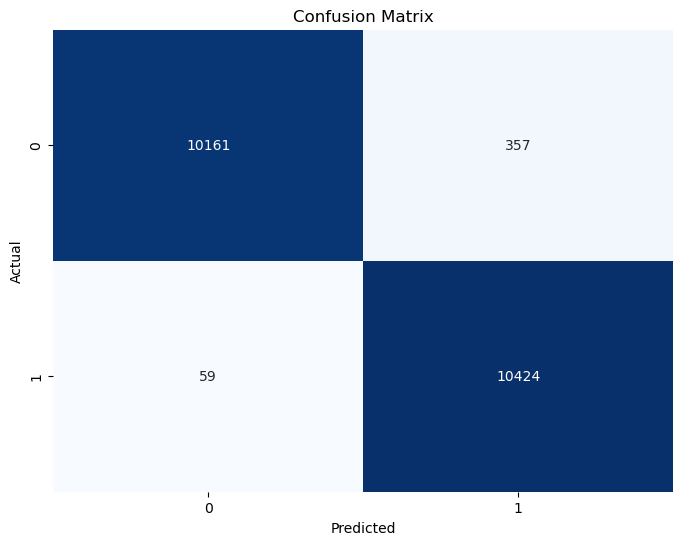

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from URLs
url_person_sitting = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTOD0G0l5yivtXqDfhWdGoKYUSFbVRKIDkSH8IM1hgdbZ7Qt3fbdxJStEI5qsZ03z_LC_KPNVmtrOYF/pub?gid=252194231&single=true&output=csv"
url_empty_chair = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRaxtjOkn-XV95EE9WyROmxMzIFpEF8cFlfMyOCz25_FwS1RlhBs1ImJQVs89R7cEesEHFUsbtk9Y_b/pub?gid=1711377743&single=true&output=csv"

# Load and combine data
df1 = pd.read_csv(url_person_sitting, header=None)
df2 = pd.read_csv(url_empty_chair, header=None)
df_combined = pd.concat([df1, df2], ignore_index=True)

# Separate features and labels
X = df_combined.iloc[:, 1:]
y = df_combined.iloc[:, 0]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print("Classification Report:\n", classification_rep)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [35]:
# Load data from URLs
# Load data from URLs
url_person_sitting = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTOD0G0l5yivtXqDfhWdGoKYUSFbVRKIDkSH8IM1hgdbZ7Qt3fbdxJStEI5qsZ03z_LC_KPNVmtrOYF/pub?gid=252194231&single=true&output=csv"
url_empty_chair = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRaxtjOkn-XV95EE9WyROmxMzIFpEF8cFlfMyOCz25_FwS1RlhBs1ImJQVs89R7cEesEHFUsbtk9Y_b/pub?gid=1711377743&single=true&output=csv"

# Load and combine data
df1 = pd.read_csv(url_person_sitting, header=None)
df2 = pd.read_csv(url_empty_chair, header=None)
df_combined = pd.concat([df1, df2], ignore_index=True)

# Separate features and labels
X = df_combined.iloc[:, 1:]

y = df_combined.iloc[:, 0]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print shapes of training and testing data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (49000, 85)
Shape of X_test: (21001, 85)
Shape of y_train: (49000,)
Shape of y_test: (21001,)
